In [1]:
import scipy.io as io
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

sb.set_style('darkgrid')

In [2]:
# Load the data
mat = io.loadmat('Faraday_con_ruido.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'S', 't'])

In [3]:
#Notar que indice esta en milisegundos.

df = pd.DataFrame(mat['S'], columns=['S'], index = mat['t'][0])
df.index = df.index*1000
df.head()

,S
0.0,0.550278
1.0,0.550117
2.0,0.549151
3.0,0.549151
4.0,0.546252


# Signal Processing.

Se utilizan datos entre los segundos 1 y 5 para el inicio del desglose y procesamiento de la señal.

In [4]:
# signal processing lib

from scipy import signal
from scipy.signal import butter, lfilter, freqz
from scipy.signal import find_peaks
from scipy.signal import peak_widths
from scipy.signal import peak_prominences

# time series lib
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
subset1 = df[1000:61000]
subset1.describe()

,S
count,60001.000000
mean,-0.054925
std,0.301654
min,-1.028868
25%,-0.251454
50%,-0.054201
75%,0.144661
max,1.031094


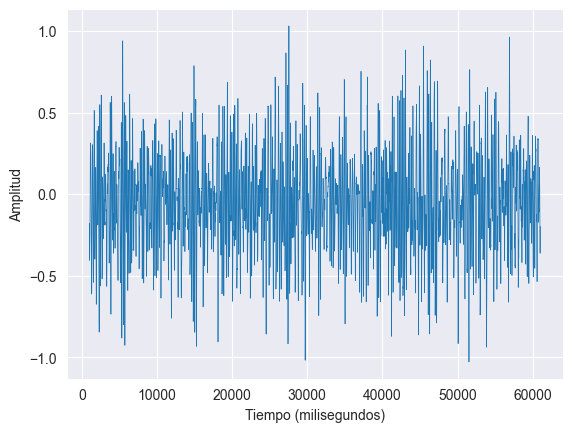

In [6]:
plt.plot(subset1.S, linewidth = 0.5)
plt.xlabel("Tiempo (milisegundos)")
plt.ylabel("Amplitud")
plt.show()

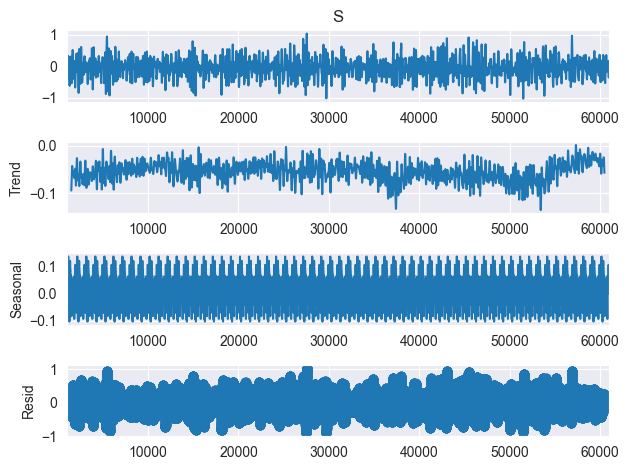

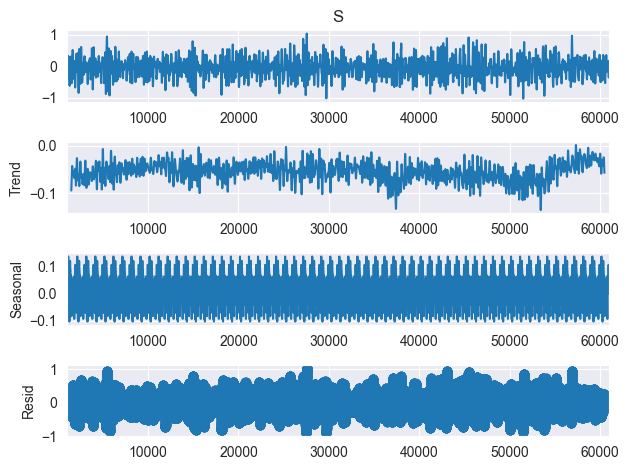

In [7]:
decompose_subset = seasonal_decompose(subset1.S, model='additive', period=1000)
decompose_subset.plot()

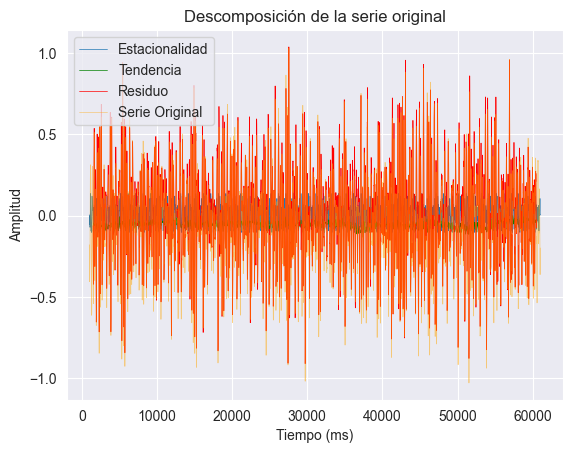

In [8]:
decompose_subset.seasonal.plot(linewidth=0.5)
decompose_subset.trend.plot(linewidth=0.5, color = 'green')
decompose_subset.resid.plot(linewidth=0.5, color = 'red')
plt.plot(subset1, linewidth=0.5, alpha=0.5, color='orange')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud')
plt.legend(['Estacionalidad', 'Tendencia', 'Residuo', 'Serie Original'])
plt.title('Descomposición de la serie original')
plt.savefig("figura_600dpi.png", dpi=600)
plt.show()

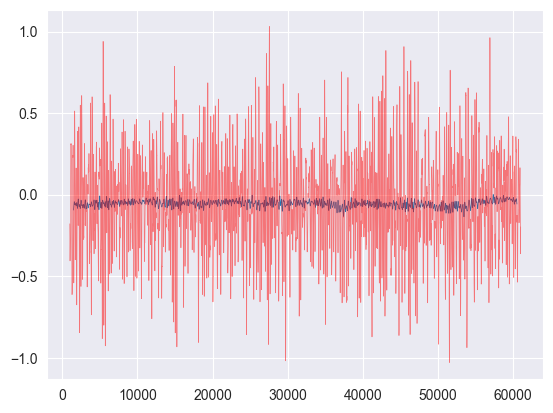

In [9]:
decompose_subset.trend.plot(linewidth=0.5)
plt.plot(subset1, linewidth=0.5, alpha=0.5, color='red')